In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#importation des données
df=pd.read_csv("JVA.csv")
df

,jeu,Genre,nom_plateforme,nom_fabricant,editeur,developpeur,annee,ttl_sales,dev_country,metacritic_summary,...,igdb_age_rating_category,igdb_age_rating_class,igdb_developer_name,igdb_developer_country,igdb_publisher_name,igdb_publisher_country,igdb_websites_category,igdb_websites_url,twitch_id,twitch_streams_count
0,Wii Sports,Sports,Wii,Nintendo,Nintendo,NINTENDO,2006.0,82.90,Japan,Tennis (1-4 players): Players grab the control...,...,"ESRB, PEGI, CLASS_IND, CERO, USK, GRAC, ACB","ESRB_E, PEGI_7, CLASS_IND_10, CERO_B, USK_12, ...",Nintendo EAD Software Development Group No.2,Japan,Nintendo,Japan,"official, wikipedia, wikia, twitch","http://wiisports.nintendo.com/, https://en.wik...",12232.0,1.0
1,Mario Kart 8 Deluxe,Racing,Nintendo Switch,Nintendo,Nintendo,NINTENDO,2017.0,48.41,Japan,Race and battle your friends in the definitive...,...,"ESRB, PEGI, USK, CLASS_IND, CERO, GRAC, ACB","ESRB_E, PEGI_3, USK_0, CLASS_IND_10, CERO_A, G...",Nintendo EPD,Japan,"Nintendo of America, Nintendo of Europe","United States of America, Germany","wikia, wikipedia, official, twitch, reddit","https://www.mariowiki.com/Mario_Kart_8_Deluxe,...",941530474.0,670.0
2,Super Mario Bros.,Platform,Nintendo (NES),Nintendo,Nintendo,NINTENDO,1985.0,40.24,Japan,NaN,...,"ESRB, PEGI, CLASS_IND, CERO, USK, GRAC, ACB","ESRB_E, PEGI_3, CLASS_IND_10, CERO_A, USK_0, G...","Nintendo, Nintendo EAD, Nintendo R&D4",Japan,Nintendo,Japan,"wikipedia, wikia, twitch, youtube, facebook, t...",https://en.wikipedia.org/wiki/List_of_Game_%26...,509508.0,13.0
3,Animal Crossing: New Horizons,Simulation,Nintendo Switch,Nintendo,Nintendo,NINTENDO,2020.0,40.17,Japan,If the hustle and bustle of modern life’s got ...,...,"ESRB, PEGI, USK, CERO","ESRB_E, PEGI_3, USK_0, CERO_A","Nintendo EPD, Nintendo",Japan,Nintendo,Japan,"official, wikia, wikipedia, twitter, reddit, d...",https://www.nintendo.com/games/detail/animal-c...,509538.0,1655.0
4,Counter-Strike: Global Offensive,Shooter,Microsoft Windows,PC,Valve,VALVE,2012.0,40.00,United States,Counter-Strike: Global Offensive features new ...,...,"ESRB, PEGI, USK, CLASS_IND, ACB","ESRB_M, PEGI_18, USK_18, CLASS_IND_16, ACB_R18","Hidden Path Entertainment, Valve",United States of America,Valve,United States of America,"official, wikia, wikipedia, facebook, youtube,...","http://blog.counter-strike.net/, http://counte...",32399.0,24977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20460,Tokyo Yamanote Boys for V: Main Disc,Adventure,Playstation Vita,Sony,Rejet,REJET,2017.0,0.01,Japan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20461,Asylum,Adventure,Microsoft Windows,PC,Unknown,WILLIAM F. DENMAN JR.,NaN,0.01,Unknown,NaN,...,NaN,NaN,Senscape,NaN,"Senscape, Screenplay, Med System Software",NaN,"steam, official, facebook, twitter, youtube, g...","https://store.steampowered.com/app/230210, htt...",NaN,NaN
20462,NadePro!! Kisama no Seiyuu Yatte Miro!,Adventure,Playstation 2,Sony,GungHo,GUNGHO,2009.0,0.01,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20463,Pac Attack,Action,Microsoft Windows,PC,Unknown,COMPUTERWARE,NaN,0.01,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.columns

Index(['jeu', 'Genre', 'nom_plateforme', 'nom_fabricant', 'editeur',
       'developpeur', 'annee', 'ttl_sales', 'dev_country',
       'metacritic_summary', 'metacritic_user_score', 'metacritic_score',
       'jvc_summmary', 'jvc_user_score', 'jvc_url', 'mixed_user_score',
       'igdb_id', 'igdb_category', 'igdb_follows', 'igdb_hypes',
       'igdb_franchise', 'igdb_platforms', 'igdb_genres', 'igdb_game_modes',
       'igdb_rating', 'igdb_summary', 'igdb_themes', 'igdb_total_rating',
       'igdb_url', 'igdb_age_content_descriptions', 'igdb_age_rating_category',
       'igdb_age_rating_class', 'igdb_developer_name',
       'igdb_developer_country', 'igdb_publisher_name',
       'igdb_publisher_country', 'igdb_websites_category', 'igdb_websites_url',
       'twitch_id', 'twitch_streams_count'],
      dtype='object')

In [25]:
#duplicata ?
df.duplicated().sum()

0

In [26]:
#info sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20465 entries, 0 to 20464
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   jeu                            20465 non-null  object 
 1   Genre                          20465 non-null  object 
 2   nom_plateforme                 20465 non-null  object 
 3   nom_fabricant                  20465 non-null  object 
 4   editeur                        20465 non-null  object 
 5   developpeur                    20463 non-null  object 
 6   annee                          19647 non-null  float64
 7   ttl_sales                      20465 non-null  float64
 8   dev_country                    20459 non-null  object 
 9   metacritic_summary             9734 non-null   object 
 10  metacritic_user_score          9734 non-null   float64
 11  metacritic_score               9734 non-null   float64
 12  jvc_summmary                   5028 non-null  

In [27]:
df.isna().sum()
#suppression des valeurs manquantes dans les colonnes développeur et dev_country
df = df.dropna(subset=['developpeur', 'dev_country'])

In [28]:
#Remplacement des données manquantes par 1900 (assez ancienne pour ne pas influencer, et changement de types pour avoir des années entières)
df['annee'] = df['annee'].fillna(1900)
df['annee'] = df['annee'].astype(int)

<ipython-input-28-c2027b6b5053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annee'] = df['annee'].fillna(1900)
<ipython-input-28-c2027b6b5053>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annee'] = df['annee'].astype(int)


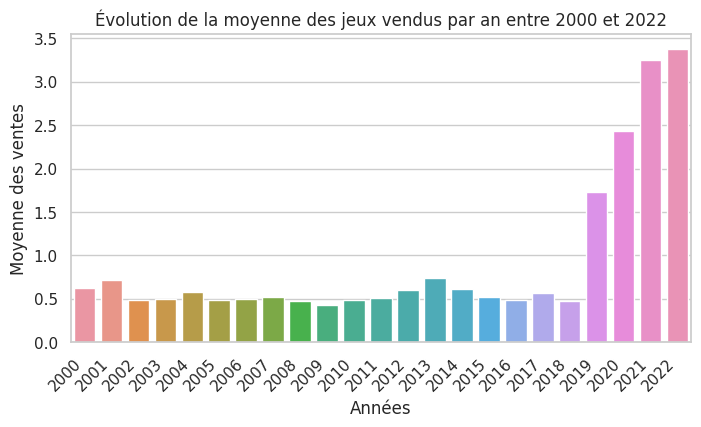

In [ ]:
# Filtrage des données pour les années de 2000 à 2022
donnees_selectionnees = df[(df['annee'] >= 2000) & (df['annee'] <= 2022)]

# Calcul de la moyenne des ventes par année
moyenne_ventes_par_annee = donnees_selectionnees.groupby('annee')['ttl_sales'].mean().reset_index()

# Graphique en barres avec Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=moyenne_ventes_par_annee, x='annee', y='ttl_sales')
plt.xlabel("Années")
plt.ylabel("Moyenne des ventes")
plt.title("Évolution de la moyenne des jeux vendus par an entre 2000 et 2022")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

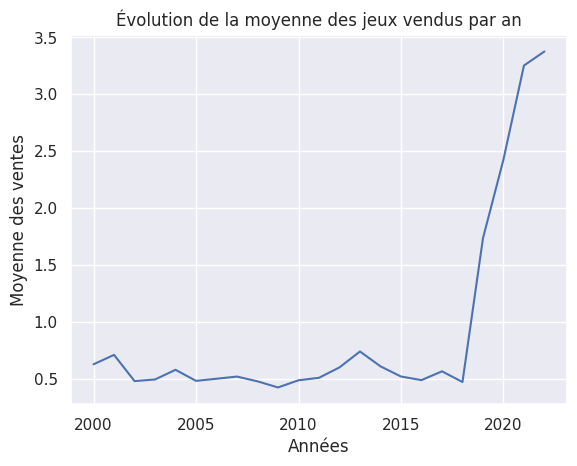

In [ ]:
# Calcul de la moyenne des ventes par année
moyenne_ventes_par_annee = donnees_selectionnees.groupby('annee')['ttl_sales'].mean()

# Graphique en courbe
sns.set(style="darkgrid")
plt.plot(moyenne_ventes_par_annee.index, moyenne_ventes_par_annee.values)
plt.xlabel("Années")
plt.ylabel("Moyenne des ventes")
plt.title("Évolution de la moyenne des jeux vendus par an")
plt.show()
#Le nombre moyen de jeux semble augmenter après 2017.

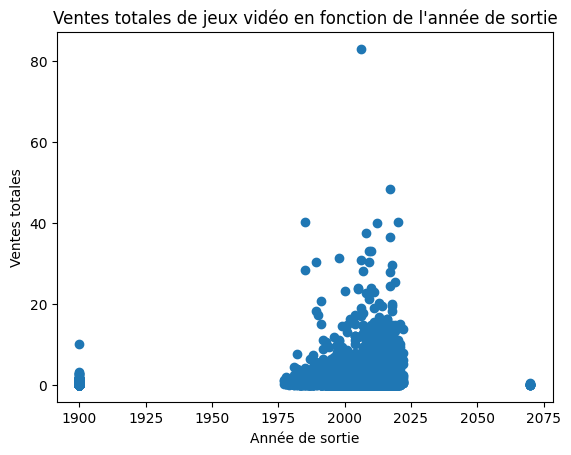

In [41]:
plt.scatter(df['annee'], df['ttl_sales'])

# Ajout de titres et labels d'axes
plt.title("Ventes totales de jeux vidéo en fonction de l'année de sortie")
plt.xlabel("Année de sortie")
plt.ylabel("Ventes totales")

# Affichage du graphique
plt.show()

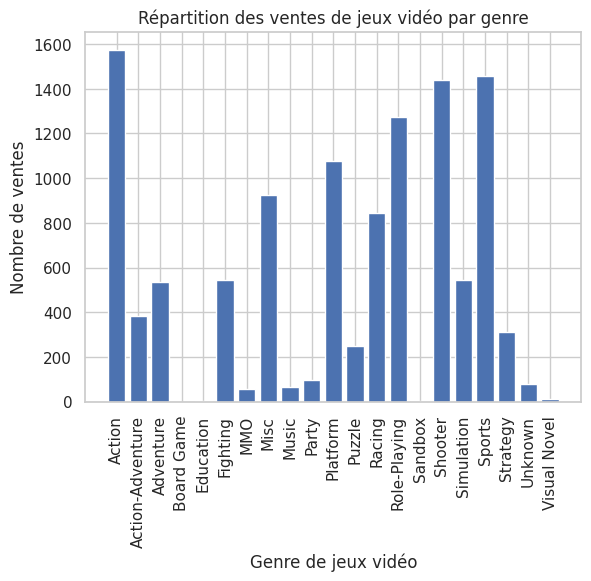

In [ ]:
# Regroupement des ventes par genre
ventes_par_genre = df.groupby('Genre')['ttl_sales'].sum().reset_index()

# Obtention des valeurs et des étiquettes de genre
genres = ventes_par_genre['Genre']
ventes = ventes_par_genre['ttl_sales']

# Création du graphique en barres
plt.bar(genres, ventes)
plt.xlabel("Genre de jeux vidéo")
plt.ylabel("Nombre de ventes")
plt.title("Répartition des ventes de jeux vidéo par genre")
plt.xticks(rotation=90)

# Affichage du graphique
plt.show()
#le genre du jeu semble avoir un effet significatif sur la vente du jeu

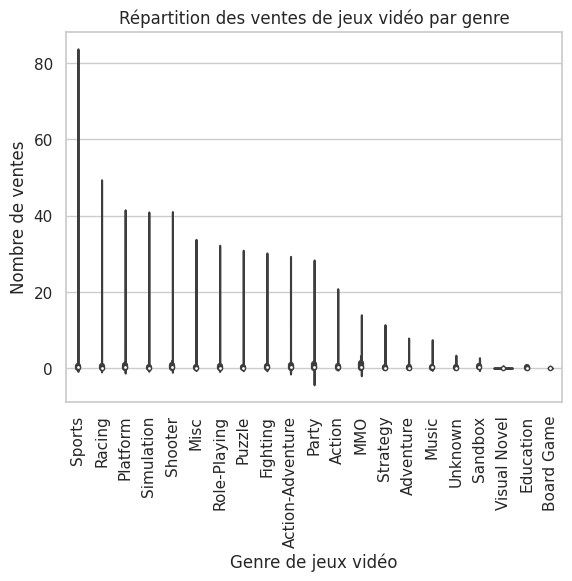

In [ ]:
# Création du graphique violon
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
sns.violinplot(x='Genre', y='ttl_sales', data=df, palette=colors)
plt.xlabel("Genre de jeux vidéo")
plt.ylabel("Nombre de ventes")
plt.title("Répartition des ventes de jeux vidéo par genre")

# Inclinaison des noms des genres sur l'axe des abscisses
plt.xticks(rotation=90)

# Affichage du graphique
plt.show()

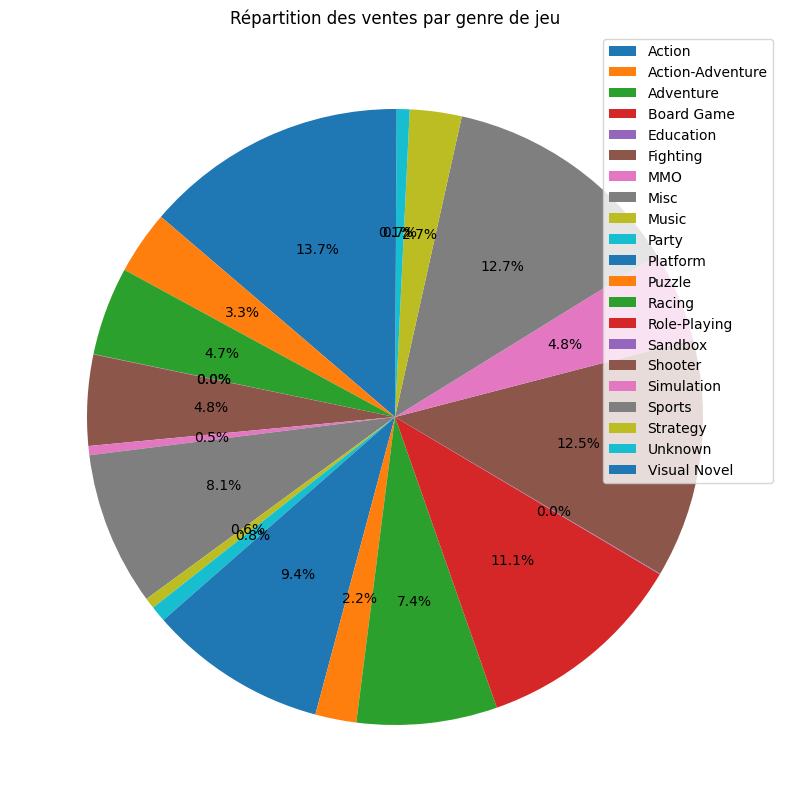

In [40]:
#exploration graphique circulaire pour la vente de jeux par genre
ventes_par_genre = df.groupby('Genre')['ttl_sales'].sum()
plt.figure(figsize=(10, 10))
# Créez le graphique circulaire
plt.pie(ventes_par_genre, labels=None, autopct='%1.1f%%', startangle=90)

# Ajoutez un titre
plt.title("Répartition des ventes par genre de jeu")
plt.legend(ventes_par_genre.index, loc='best')
# Affichez le graphique
plt.show()

<ipython-input-46-35597f9015a2>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


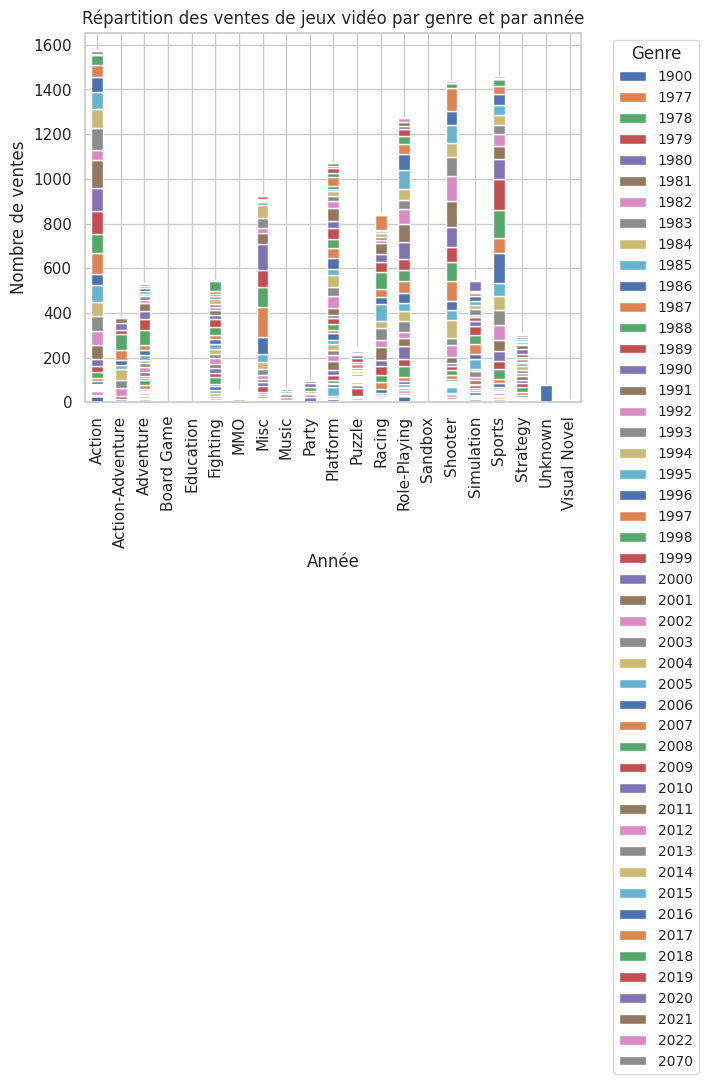

In [ ]:
ventes_par_genre_annee = df.groupby(['Genre', 'annee'])['ttl_sales'].sum().unstack().fillna(0)

# Création du graphique à barres empilées
ventes_par_genre_annee.plot(kind='bar', stacked=True)

# Personnalisation des étiquettes des axes et du titre
plt.xlabel("Année")
plt.ylabel("Nombre de ventes")
plt.title("Répartition des ventes de jeux vidéo par genre et par année")

# Affichage de la légende
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1),fontsize='small')

#ajustement de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()

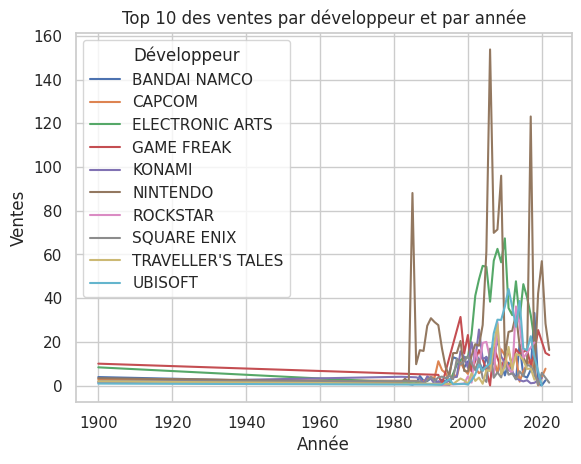

In [ ]:
# Sélection des développeurs faisant partie du top 10 des ventes
top_10_developpeurs = df.groupby('developpeur')['ttl_sales'].sum().nlargest(10).index

# Filtrage du dataframe pour inclure uniquement les développeurs du top 10
df_top_10 = df[df['developpeur'].isin(top_10_developpeurs)]

# Création du graphique avec des courbes pour chaque développeur
fig, ax = plt.subplots()
for developpeur, data in df_top_10.groupby('developpeur'):
    data.groupby('annee')['ttl_sales'].sum().plot(label=developpeur)

# Personnalisation des étiquettes des axes et du titre
plt.xlabel("Année")
plt.ylabel("Ventes")
plt.title("Top 10 des ventes par développeur et par année")

# Affichage de la légende
plt.legend(title='Développeur')

# Affichage du graphique
plt.show()
#Nintendo maintient sa part du marché (trait marron), Game Freak (en rouge): grace à pokemon et mario notamment dispose d'une bonne part du marché,
#capcom se maintient sur le marché depuis 30 ans.

In [18]:
df.isna().sum()

jeu                                  0
Genre                                0
nom_plateforme                       0
nom_fabricant                        0
editeur                              0
developpeur                          2
annee                                0
ttl_sales                            0
dev_country                          6
metacritic_summary               10731
metacritic_user_score            10731
metacritic_score                 10731
jvc_summmary                     15437
jvc_user_score                   17213
jvc_url                          15298
mixed_user_score                 10318
igdb_id                           5515
igdb_category                     5515
igdb_follows                     11282
igdb_hypes                       18784
igdb_franchise                   18414
igdb_platforms                    6036
igdb_genres                       6334
igdb_game_modes                   7860
igdb_rating                      10699
igdb_summary             

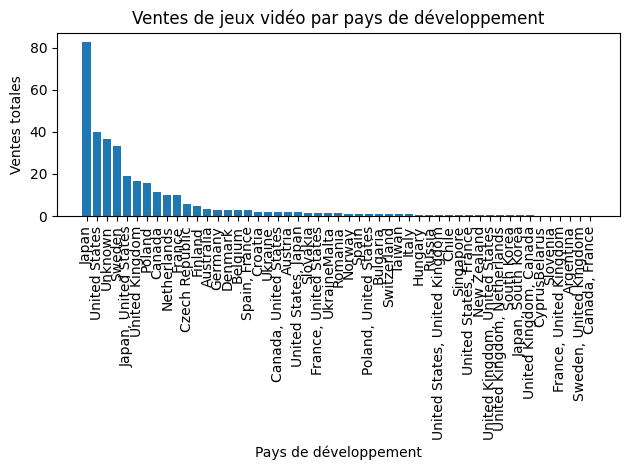

In [31]:
#Exploration de ventes de jeux vidéos par pays de développement, graph en barres
plt.bar(df['dev_country'], df['ttl_sales'])

# Ajout de titres et labels d'axes
plt.title("Ventes de jeux vidéo par pays de développement")
plt.xlabel("Pays de développement")
plt.ylabel("Ventes totales")

# Rotation des étiquettes des pays pour une meilleure lisibilité
plt.xticks(rotation=90)

#espacement des étiquettes
plt.tight_layout()

# Affichage du graphique
plt.show()

